### Ваша задача этом соревновании - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. 

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
# эти два импорта только для удобства скачивания и распаковки данных
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
api = KaggleApi()
api.authenticate()
api.competition_download_files('choose-tutors')

In [4]:
dataset_zip = zipfile.ZipFile('./choose-tutors.zip')
dataset_zip.extractall()

In [5]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'
SAMPLE_SUBMISSION_DATASET_PATH = './submission_example.csv'

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0
5,5,37.0,3.0,1050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0
6,6,54.0,3.0,800.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,1
7,7,32.0,2.0,2750.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,95.0,0
8,8,56.0,3.0,1300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0
9,9,44.0,4.0,2350.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0


In [7]:
train_df.shape

(10000, 13)

In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
5,10005,54.0,4.0,2050.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,94.0
6,10006,40.0,0.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
7,10007,29.0,0.0,1150.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.0
8,10008,44.0,6.0,2900.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
9,10009,45.0,5.0,1300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,69.0


In [9]:
test_df.shape

(10000, 12)

## EDA

In [10]:
train_df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
choose                 0
dtype: int64

In [11]:
train_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Id


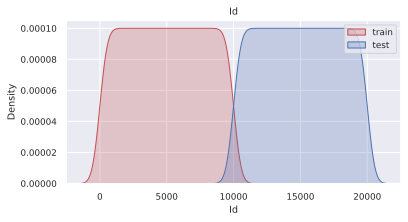

age


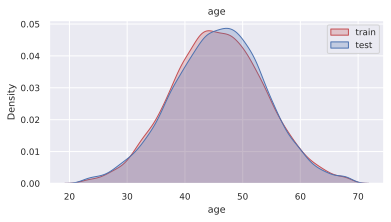

years_of_experience


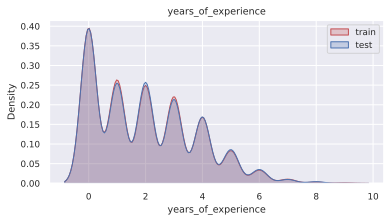

lesson_price


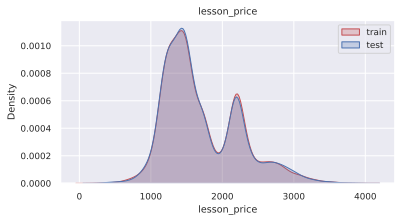

qualification


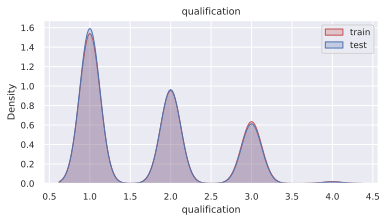

physics


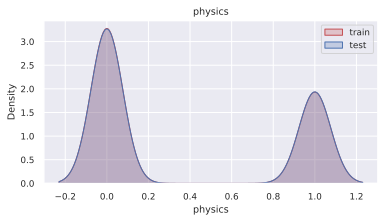

chemistry


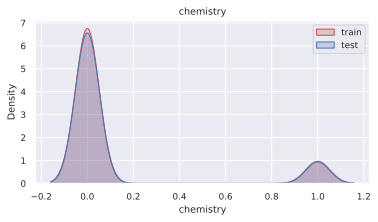

biology


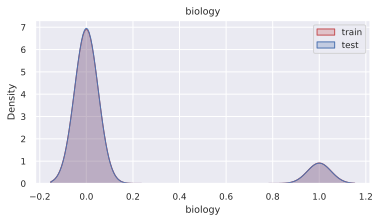

english


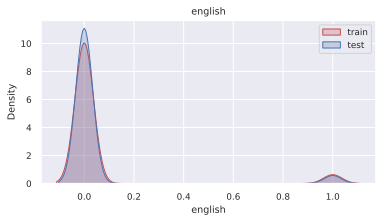

geography


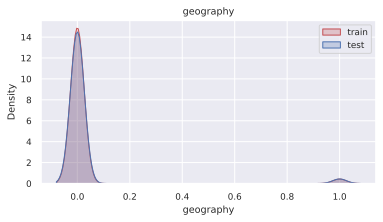

history


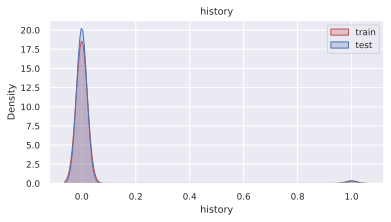

mean_exam_points


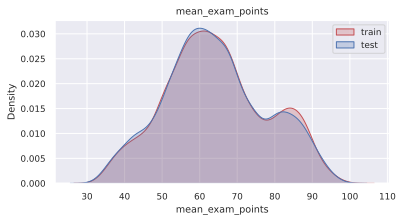

KeyError: 'choose'

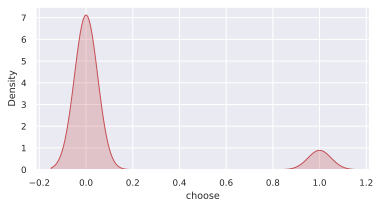

In [12]:
figsize = (6, 3)
for col in train_df:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train_df[col], shade=True, label='train', color='r')
    sns.kdeplot(test_df[col], shade=True, label='test', color='b')
    print(col)
#     plt.yscale('log')
    plt.legend()
    plt.title(col)
    plt.show()

В целом распределение наблюдений внутри признака на трейне и тесте похожи, а вот то, что семикратный перевес нулевого класса - может картину портить

In [13]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [14]:
# И класс терминального узла (листа)

class Leaf:
    
    counter = 0
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        self.prediction_regressor = self.predict_regressor()
        type(self).counter += 1
        
    def predict_regressor(self):
        return np.mean(self.labels)
    
    def predict_proba(self, target_class=1):
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = round(classes.get(target_class, 0) / sum([classes.get(key, 0) for key in classes.keys()]), 4)
        return prediction 
        
    def predict(self, proba=0.5, target_class=1):
        predict_proba = self.predict_proba(target_class=target_class)
        
        if predict_proba >= proba:
            prediction = target_class
        else:
            #всвязи с тем что двухклассовая задача, чтобы не городить черт знает что:
            prediction = 1 - target_class
        return prediction        

In [36]:
class DecisionTree():
    
    def __init__(self, max_depth=0, max_leaf=0, min_samples_leaf=1, criterion='gini'):
        self.max_depth = max_depth
        self.max_leaf = max_leaf
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        
        
        
    # Расчет критерия Джини

    def gini(self, labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2

        return impurity
    
    def entropy(self, labels):
        classes = np.unique(labels)
        entropy = -sum([((labels == classes[i]).sum() / len(labels)) * \
                  np.log2((labels == classes[i]).sum() / len(labels)) \
                  for i in range(len(classes))])
        return entropy
    
    def quality_entropy(self, left_labels, right_labels, current_entropy):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_entropy - p * self.entropy(left_labels) - (1 - p) * self.entropy(right_labels)
    
    def quality(self, left_labels, right_labels, current_gini):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return current_gini - p * self.gini(left_labels) - (1 - p) * self.gini(right_labels)
    
        # Разбиение датасета в узле

    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
#         # Построение дерева с помощью рекурсивной функции

    def build_tree(self, data, labels, ind=0):
        
        indx = ind
        indx +=1

        quality, t, index = self.find_best_split(data, labels)

        if len(labels) < self.min_samples_leaf * 2:
            return Leaf(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
        
#         проверяем количество листьев в дереве:
        if Leaf.counter > self.max_leaf - 2:
            return Leaf(data, labels)
#         бывают расхождения по максимальному количеству листьев +- 2 штуки, как железно ограничить так и не смог придумать)
#         при долгих размышлениях я пришел к выводу, что использование
#         только этого критерия останова нецелесообразно или во всяком случае слишком малое его 
#         значение - можно не успеть выйти из первой рекурсии, а такой исход мне представляется
#         не очень веселым, т.к. у нас будет всего полдерева и при построении 
#         предикта алгоритм поломается сразу на корневом узле

        #  Проверяем глубину узла
        if indx == self.max_depth + 1:
            return Leaf(data, labels)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, indx)
        false_branch = self.build_tree(false_data, false_labels, indx)

        node = Node(index, t, true_branch, false_branch)
        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return node
    
    def _pred_object(self, obj, node, target_class, proba, predict_proba):
#         print(node.index, 1, node.true_branch.index, 2, node.false_branch.index)

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            if predict_proba:
                answer = node.predict_proba(target_class=target_class)
                return answer
            else:
                answer = node.predict(target_class=target_class, proba=proba)
                return answer
        if obj[node.index] <= node.t:
            return self._pred_object(obj, node.true_branch, target_class, proba, predict_proba)
        else:
            return self._pred_object(obj, node.false_branch, target_class, proba, predict_proba)
        
    def predict(self, data, tree, target_class=1, proba=0.5, predict_proba=True):

        pred = []
        for obj in data:
            prediction = self._pred_object(obj, tree, target_class, proba, predict_proba)
            pred.append(round(prediction, 4))
        return pred

In [16]:
class DecisionTreeClassifier(DecisionTree):
    
    # Расчет критерия Джини

    def gini(self, labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2

        return impurity
    
    def entropy(self, labels):
        classes = np.unique(labels)
        entropy = -sum([((labels == classes[i]).sum() / len(labels)) * \
                  np.log2((labels == classes[i]).sum() / len(labels)) \
                  for i in range(len(classes))])
        return entropy
    
    def quality_entropy(self, left_labels, right_labels, current_entropy):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_entropy - p * self.entropy(left_labels) - (1 - p) * self.entropy(right_labels)
    
    def quality(self, left_labels, right_labels, current_gini):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return current_gini - p * self.gini(left_labels) - (1 - p) * self.gini(right_labels)
    
            # Нахождение наилучшего разбиения

    def find_best_split(self, data, labels):

        if self.criterion == 'gini':
            current_criterion = self.gini(labels)
        else:
            current_criterion = self.entropy(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                if self.criterion == 'gini':
                    current_quality = self.quality(true_labels, false_labels, current_criterion)
                else:
                    current_quality = self.quality_entropy(true_labels, false_labels, current_criterion)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index
#         print(best_index)
        return best_quality, best_t, best_index

In [17]:
import random
class RandomForestClassifier(DecisionTreeClassifier):
    
    def __init__(self, max_depth=0, max_leaf=0, min_samples_leaf=1, criterion='gini', random_state=random.randint(0, 1000), target_class=1):
        super().__init__(max_depth, max_leaf, min_samples_leaf, criterion)
        random.seed(random_state)
        self.random_state = random_state
        self.target_class = target_class
    
    def random_forest(self, data, labels, n_trees):
        forest = []
        bootstrap = self.get_bootstrap(data, labels, n_trees)

        for b_data, b_labels in bootstrap:
            Leaf.counter = 0
            forest.append(self.build_tree(b_data, b_labels))

        return forest, bootstrap
    
    def out_of_bag(self, X_train, y_train, n_forest, bootstrap):
        obj_q = 0
        true_obj = 0
        for i in range(len(X_train)):
            trees = 0
            true = 0
            for ii in range(len(n_forest)):
                if np.all(bootstrap[ii][0] != X_train[i]):
                    trees += 1
                    tmp_tree = self.build_tree(bootstrap[ii][0], bootstrap[ii][1])
                    answer = self.predict(X_train[i]. reshape(1, 2), tmp_tree)
                    if answer == y_train[i]:
                        true += 1
                else:
                    continue
            if trees == 0:
                continue
            else:
                obj_q += 1
                if (true / trees) > 0.5:
                    true_obj += 1
        return true_obj / obj_q

    # предсказание голосованием деревьев

    def tree_vote(self, data, labels, forest, plot=False, target_class=1, proba=0.5, predict_proba=False):

        # добавим предсказания всех деревьев в список
        predictions = []
        for tree in forest:
            if predict_proba:
                predictions.append(self.predict(data, tree, target_class, proba, predict_proba))
            else:
                predictions.append(self.predict(data, tree, target_class, proba, predict_proba))

        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))

        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_predictions = []
        for obj in predictions_per_object:
            if predict_proba:
                voted_predictions.append(np.mean(np.array(obj)))
            else:
                voted_predictions.append(max(set(obj), key=obj.count))

        if not predict_proba:
            if not plot:
                self.calc_accuracy(np.array(voted_predictions), labels)
        #             self.calc_precision(answers, self.y_test)
        #             self.calc_recall(answers, self.y_test)
                self.calc_f_score(np.array(voted_predictions), labels)
        return voted_predictions
    
    
 
    def get_bootstrap(self, data, labels, N):
        random.seed(self.random_state)
        n_samples = data.shape[0]
        bootstrap = []

        for i in range(N):
            b_data = np.zeros(data.shape)
            b_labels = np.zeros(labels.shape)
            for j in range(n_samples):
                sample_index = random.randint(0, n_samples-1)
                b_data[j] = data[sample_index]
                b_labels[j] = labels[sample_index]            
            bootstrap.append((b_data, b_labels))

        return bootstrap
   
    def get_subsample(self, len_sample):
        # будем сохранять не сами признаки, а их индексы
        sample_indexes = [i for i in range(len_sample)]

        len_subsample = int(np.sqrt(len_sample))
        subsample = []

        random.shuffle(sample_indexes)
        for _ in range(len_subsample):
            subsample.append(sample_indexes.pop())

        return subsample

    def find_best_split(self, data, labels):

        if self.criterion == 'gini':
            current_criterion = self.gini(labels)
        else:
            current_criterion = self.entropy(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        subsample = self.get_subsample(n_features)
    
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                if self.criterion == 'gini':
                    current_quality = self.quality(true_labels, false_labels, current_criterion)
                else:
                    current_quality = self.quality_entropy(true_labels, false_labels, current_criterion)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index
#         print(best_index)
        return best_quality, best_t, best_index

    def calc_accuracy(self,y_pred, y):
        accuracy = 100.0 - np.mean(np.abs(y_pred - y)*100.0)
        print(f'Accuracy: {accuracy}')
        
        return accuracy
    
    
    def matrix_err(self, y_pred, y, prnt=True):
        tp = np.count_nonzero((self.target_class == y) & (y_pred == self.target_class))
        tn = np.count_nonzero((self.target_class != y) & (y_pred != self.target_class))
        fp = np.count_nonzero((self.target_class != y) & (y_pred == self.target_class))
        fn = np.count_nonzero((self.target_class == y) & (y_pred != self.target_class))
        if prnt:
            print('TP     FP\nFN     TN')
            print(np.array([[tp, fp], [fn, tn]]))
        
        return tp, tn, fp, fn
    
    
    def calc_precision(self,y_pred, y):
        tp, tn, fp, fn = self.matrix_err(y_pred, y)
        precision = tp / (tp + fp)
        print(f'Precision: {precision}')
        
        return precision
    
    
    def calc_recall(self,y_pred, y):
        tp, tn, fp, fn = self.matrix_err(y_pred, y)
        recall = tp / (tp + fn)
        print(f'Recall: {recall}')
        
        return recall
    
    
    def calc_f_score(self,y_pred, y, beta=1):
        tp, tn, fp, fn = self.matrix_err(y_pred, y)
        precision = self.calc_precision(y_pred, y)
        recall = self.calc_recall(y_pred, y)
        f_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)
        print(f'F-score: {f_score}')
        return f_score
    
    def auc_roc(self, y_pred, y):
        tp, tn, fp, fn = self.matrix_err(y_pred, y)

def train_test_split(data, proportion=0.7):
    # перемешивание датасета
    np.random.seed(12)
    shuffle_index = np.random.permutation(data[0].shape[0])
    X_shuffled, y_shuffled = data[0][shuffle_index], data[1][shuffle_index]

    # разбивка на обучающую и тестовую выборки
    train_proportion = proportion
    train_test_cut = int(len(data[0]) * train_proportion)

    X_train, X_test, y_train, y_test = \
        X_shuffled[:train_test_cut], \
        X_shuffled[train_test_cut:], \
        y_shuffled[:train_test_cut], \
        y_shuffled[train_test_cut:]
    list_array = [X_train, X_test, y_train, y_test]
    
#     X_train, X_test, y_train, y_test = transpose(list_array)

    print("Размер массива признаков обучающей выборки", X_train.shape)
    print("Размер массива признаков тестовой выборки", X_test.shape)
    print("Размер массива ответов для обучающей выборки", y_train.shape)
    print("Размер массива ответов для тестовой выборки", y_test.shape)
    
    return X_train, X_test, y_train, y_test

target_counts = train_df[choose].value_counts()

major_class_name = target_counts.argmax()
minor_class_name = target_counts.argmin()
df_ = train_df.copy()
df = df_[df_[choose] == minor_class_name]
tmp = df_[df_[choose] == major_class_name]
df = df.append(tmp.iloc[
    np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
], ignore_index=True)

In [18]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

train_df = balance_df_by_target(train_df, 'choose')

train_df = np.array(train_df)

train_df.shape

X = train_df.copy()[:, 1:]
X.shape

X, y = X[:, :-1], X[:, -1]

X.shape

y.shape

X_train, X_test, y_train, y_test = train_test_split([X, y])

In [19]:
TARGET_NAME = 'choose'

In [20]:
X = train_df.drop(columns=TARGET_NAME)
y = pd.Series(train_df[TARGET_NAME])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21, stratify=y)

In [22]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, method='over')
    
df_balanced[TARGET_NAME].value_counts()

0    7113
1    7096
Name: choose, dtype: int64

In [23]:
X_train_balanced = np.array(df_balanced.drop(columns=TARGET_NAME))
y_train_balanced = np.array(df_balanced[TARGET_NAME])
X_test = np.array(X_test)
y_test = np.array(y_test)

b = pd.DataFrame(np.hstack((X, y.reshape((y.shape[0], 1)))))
b

In [24]:
forest = RandomForestClassifier(max_depth=5, min_samples_leaf=10, max_leaf=30, random_state=13, target_class=1)
forest_1, bootstrap = forest.random_forest(X_train_balanced, y_train_balanced, 25)

In [25]:
train_pred = forest.tree_vote(X_train_balanced, y_train_balanced, forest_1, predict_proba=True)
test_pred = forest.tree_vote(X_test, y_test, forest_1, predict_proba=True)

In [26]:
def tpr_fpr(y, y_pred_proba, forest):
    TPR = []
    FPR = []
    for prob in np.unique(y_pred_proba):
        y_pred = np.array(y_pred_proba)
        y_pred[y_pred >= prob] = 1
        tp, tn, fp, fn = forest.matrix_err(y_pred, y, prnt=False)
        TPR.append(tp / (tp + fn))
        if fp == 0 and tn == 0:
            FPR.append(0.0)
        else:
            FPR.append(fp / (fp + tn))
    return TPR, FPR

In [27]:
def roc_auc(y_train, y_train_pred_proba, 
            y_test, y_test_pred_proba, forest):
    from numpy import trapz  # используем эту функцию для расчета площади под кривой

    TPR_train, FPR_train = tpr_fpr(y_train, y_train_pred_proba, forest)
    TPR_test, FPR_test = tpr_fpr(y_test, y_test_pred_proba, forest)

    AUC_ROC_train = trapz(TPR_train, x = FPR_train, dx=0.1)
    AUC_ROC_test = trapz(TPR_test, x = FPR_test, dx=0.1)

    plt.title('ROC curve')
    plt.ylim(0, 1.05)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
#     plt.scatter(FPR, TPR)
    plt.plot(FPR_train, TPR_train, 'r')
    plt.plot(FPR_test, TPR_test, 'b')
    plt.legend([f'train={AUC_ROC_train:.3f}', f'test={AUC_ROC_test:.3f}'], title=f'AUC-ROC', loc='lower right')

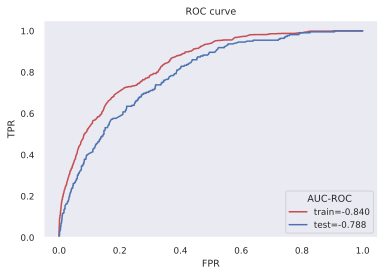

In [28]:
roc_auc(y_train_balanced, train_pred, y_test, test_pred, forest)

In [29]:
submission = pd.read_csv(SAMPLE_SUBMISSION_DATASET_PATH)
submission

,Id,choose
0,10000,0.5
1,10001,0.5
2,10002,0.5
3,10003,0.5
4,10004,0.5
...,...,...
9995,19995,0.5
9996,19996,0.5
9997,19997,0.5
9998,19998,0.5


In [32]:
X_submission = np.array(test_df)

In [34]:
sub_pred = forest.tree_vote(X_submission, None, forest_1, predict_proba=True)

In [39]:
sub_pred = np.array(sub_pred)
sub_pred

array([0.198052, 0.688684, 0.120884, ..., 0.675432, 0.737564, 0.251776])

In [38]:
submission[TARGET_NAME] = sub_pred
submission

,Id,choose
0,10000,0.198052
1,10001,0.688684
2,10002,0.120884
3,10003,0.248600
4,10004,0.513332
...,...,...
9995,19995,0.640008
9996,19996,0.532032
9997,19997,0.675432
9998,19998,0.737564


In [40]:
submission.to_csv('rf.csv', index=False)